## GRIDSEARCH

## Grid Search Precision Random Forest

In [6]:
import pandas as pd

In [13]:
X_train_processed =pd.read_csv("../../raw_data/X_train_processed_v0.csv")
X_test_processed =pd.read_csv("../../raw_data/X_test_processed_v0.csv")
y_train = pd.read_csv("../../raw_data/y_train_v0.csv")
y_test = pd.read_csv("../../raw_data/y_test_v0.csv")

🔍 Starting Grid Search for Random Forest (optimizing for precision)...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/Users/arthurautret/.pyenv/versions/3.10.6/envs/F1_project_1907/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/arthurautret/.pyenv/versions/3.10.6/envs/F1_project_1907/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/arthurautret/.pyenv/versions/3.10.6/envs/F1_project_1907/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/arthurautret/.pyenv/versions/3.10.6/env


✨ Best parameters for maximizing precision:
{'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

📈 Best precision score: 0.7850

🎯 Evaluating best model on test set:
Report : 
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       190
           1       1.00      0.04      0.08        94

    accuracy                           0.68       284
   macro avg       0.84      0.52      0.45       284
weighted avg       0.78      0.68      0.57       284



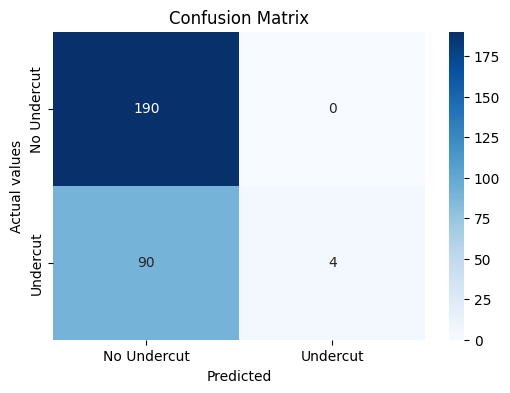


📊 All tested combinations sorted by precision score:
                                                params  mean_test_score  \
417  {'class_weight': None, 'max_depth': 10, 'max_f...         0.785000   
338  {'class_weight': None, 'max_depth': 8, 'max_fe...         0.780000   
280  {'class_weight': None, 'max_depth': 6, 'max_fe...         0.775000   
414  {'class_weight': None, 'max_depth': 10, 'max_f...         0.774286   
335  {'class_weight': None, 'max_depth': 8, 'max_fe...         0.765000   

     std_test_score  
417        0.199750  
338        0.203961  
280        0.200000  
414        0.209255  
335        0.230000  


In [14]:
# Grid Search for Random Forest (optimizing for precision)
from sklearn.model_selection import GridSearchCV
from f1_project.f1_packages.model import initialize_model, train_model, pred

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]  # Adding class_weight parameter to help with precision
}

print("🔍 Starting Grid Search for Random Forest (optimizing for precision)...")

# Initialize base model
base_model = initialize_model('randomforest')

# Create GridSearchCV with focus on precision
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='precision',  # Changed to optimize for precision specifically
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train)

# Print results
print("\n✨ Best parameters for maximizing precision:")
print(grid_search.best_params_)
print(f"\n📈 Best precision score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
print("\n🎯 Evaluating best model on test set:")
y_pred, y_proba = pred(grid_search.best_estimator_, X_test_processed, y_test)

# Store the best model
best_rf_model = grid_search.best_estimator_

# Print all results in order of precision
print("\n📊 All tested combinations sorted by precision score:")
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
print(results[['params', 'mean_test_score', 'std_test_score']].head())

## Grid Search Precision XGBoost = 0.85

🔍 Starting Grid Search for XGBoost (optimizing for precision)...
Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


/Users/arthurautret/.pyenv/versions/3.10.6/envs/F1_project_1907/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arthurautret/.pyenv/versions/3.10.6/envs/F1_project_1907/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arthurautret/.pyenv/versions/3.10.6/envs/F1_project_1907/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


✨ Best parameters for maximizing precision:
{'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 200, 'scale_pos_weight': 0.5, 'subsample': 0.7}

📈 Best precision score: 0.8533

🎯 Evaluating best model on test set:
Report : 
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       190
           1       0.50      0.01      0.02        94

    accuracy                           0.67       284
   macro avg       0.59      0.50      0.41       284
weighted avg       0.61      0.67      0.54       284



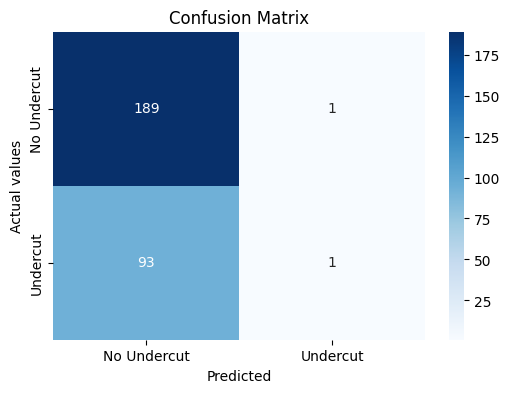


📊 All tested combinations sorted by precision score:
                                                 params  mean_test_score  \
3546  {'colsample_bytree': 0.9, 'gamma': 0.2, 'learn...         0.853333   
4205  {'colsample_bytree': 0.9, 'gamma': 0.3, 'learn...         0.800000   
3476  {'colsample_bytree': 0.9, 'gamma': 0.2, 'learn...         0.800000   
1092  {'colsample_bytree': 0.7, 'gamma': 0.3, 'learn...         0.773333   
2523  {'colsample_bytree': 0.8, 'gamma': 0.3, 'learn...         0.753333   

      std_test_score  
3546        0.180862  
4205        0.244949  
3476        0.244949  
1092        0.186667  
2523        0.208273  


In [32]:
# Grid Search for XGBoost (optimizing for precision)
from sklearn.model_selection import GridSearchCV
from f1_project.f1_packages.model import initialize_model, train_model, pred
import numpy as np

# Convert y variables to 1d array using ravel()
y_train_1d = np.array(y_train).ravel()
y_test_1d = np.array(y_test).ravel()

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [150,200,250],
    'learning_rate': [0.005,0.01, 0.05],
    'max_depth': [2,3, 4],
    'min_child_weight': [4,5,6],
    'gamma': [0.2, 0.3],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.7,0.8, 0.9],
    'scale_pos_weight': [0.5,1, 2]  # Help with imbalanced classes
}

print("🔍 Starting Grid Search for XGBoost (optimizing for precision)...")

# Initialize base model
base_model = initialize_model('XGBC')

# Create GridSearchCV with focus on precision
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='precision',  # Optimizing for precision
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train_1d)

# Print results
print("\n✨ Best parameters for maximizing precision:")
print(grid_search.best_params_)
print(f"\n📈 Best precision score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
print("\n🎯 Evaluating best model on test set:")
y_pred, y_proba = pred(grid_search.best_estimator_, X_test_processed, y_test_1d)

# Store the best model
best_xgb_model = grid_search.best_estimator_

# Print all results in order of precision
print("\n📊 All tested combinations sorted by precision score:")
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
print(results[['params', 'mean_test_score', 'std_test_score']].head())

## Random Forest for RECALL

🔍 Starting Grid Search for Random Forest (optimizing for recall)...
Fitting 5 folds for each of 2160 candidates, totalling 10800 fits

✨ Best parameters for maximizing recall:
{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

📈 Best recall score: 0.5657

🎯 Evaluating best model on test set:
Report : 
              precision    recall  f1-score   support

           0       0.73      0.61      0.66       190
           1       0.40      0.54      0.46        94

    accuracy                           0.58       284
   macro avg       0.57      0.57      0.56       284
weighted avg       0.62      0.58      0.60       284



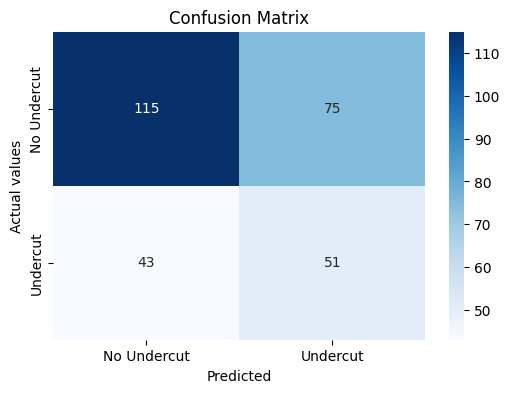


📊 All tested combinations sorted by recall score:
                                                 params  mean_test_score  \
1126  {'class_weight': 'balanced_subsample', 'criter...         0.565730   
1129  {'class_weight': 'balanced_subsample', 'criter...         0.565730   
1132  {'class_weight': 'balanced_subsample', 'criter...         0.563027   
772   {'class_weight': 'balanced_subsample', 'criter...         0.562991   
766   {'class_weight': 'balanced_subsample', 'criter...         0.562991   

      std_test_score  
1126        0.033735  
1129        0.033735  
1132        0.035077  
772         0.030039  
766         0.030039  


In [18]:
# Grid Search for Random Forest (optimizing for recall)
from sklearn.model_selection import GridSearchCV
from f1_project.f1_packages.model import initialize_model, train_model, pred
import numpy as np

# Convert y variables to 1d array using ravel()
y_train_1d = np.array(y_train).ravel()
y_test_1d = np.array(y_test).ravel()

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2,3,4,5],
    'min_samples_split': [10,12,15],
    'min_samples_leaf': [4,5,6,7,8],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None],  # Added balanced_subsample for better recall
    'criterion': ['gini', 'entropy']  # Added criterion parameter
}

print("🔍 Starting Grid Search for Random Forest (optimizing for recall)...")

# Initialize base model
base_model = initialize_model('randomforest')

# Create GridSearchCV with focus on recall
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='recall',  # Changed to optimize for recall
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train_1d)

# Print results
print("\n✨ Best parameters for maximizing recall:")
print(grid_search.best_params_)
print(f"\n📈 Best recall score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
print("\n🎯 Evaluating best model on test set:")
y_pred, y_proba = pred(grid_search.best_estimator_, X_test_processed, y_test_1d)

# Store the best model
best_rf_recall_model = grid_search.best_estimator_

# Print all results in order of recall score
print("\n📊 All tested combinations sorted by recall score:")
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
print(results[['params', 'mean_test_score', 'std_test_score']].head())

In [19]:
best_rf_recall_model

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=2, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

## XGBOOSTCLASSIFIER for RECALL = 0.92

🔍 Starting Grid Search for XGBoost (optimizing for recall)...
Fitting 3 folds for each of 768 candidates, totalling 2304 fits

✨ Best parameters for maximizing recall:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 3, 'subsample': 0.8}

📈 Best recall score: 0.9277

🎯 Evaluating best model on test set:
Report : 
              precision    recall  f1-score   support

           0       0.82      0.09      0.17       190
           1       0.34      0.96      0.51        94

    accuracy                           0.38       284
   macro avg       0.58      0.53      0.34       284
weighted avg       0.66      0.38      0.28       284



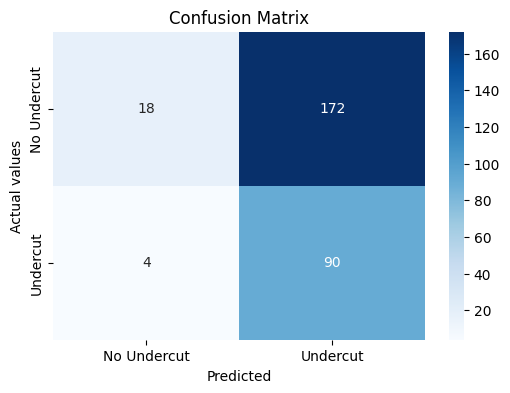


📊 All tested combinations sorted by recall score:
                                                params  mean_test_score  \
234  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...         0.927742   
42   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...         0.927742   
43   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...         0.925054   
235  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...         0.925054   
226  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...         0.919699   

     std_test_score  
234        0.042818  
42         0.042818  
43         0.035860  
235        0.035860  
226        0.036208  


In [26]:
# Grid Search for XGBoost (optimizing for recall)
from sklearn.model_selection import GridSearchCV
from f1_project.f1_packages.model import initialize_model, train_model, pred
import numpy as np

# Convert y variables to 1d array using ravel()
y_train_1d = np.array(y_train).ravel()
y_test_1d = np.array(y_test).ravel()

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, 3],  # Increased values to favor recall
    'max_delta_step': [0, 1]  # Added to help with class imbalance
}

print("🔍 Starting Grid Search for XGBoost (optimizing for recall)...")

# Initialize base model
base_model = initialize_model('XGBC')

# Create GridSearchCV with focus on recall
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='recall',  # Changed to optimize for recall
    cv=3,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train_1d)

# Print results
print("\n✨ Best parameters for maximizing recall:")
print(grid_search.best_params_)
print(f"\n📈 Best recall score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
print("\n🎯 Evaluating best model on test set:")
y_pred, y_proba = pred(grid_search.best_estimator_, X_test_processed, y_test_1d)

# Store the best model
best_xgb_recall_model = grid_search.best_estimator_

# Print all results in order of recall score
print("\n📊 All tested combinations sorted by recall score:")
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
print(results[['params', 'mean_test_score', 'std_test_score']].head())

## Gradient Boosting Classifier Recall  

🔍 Starting Grid Search for Gradient Boosting (optimizing for recall)...
Fitting 3 folds for each of 768 candidates, totalling 2304 fits

✨ Best parameters for maximizing recall:
{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 4, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_iter_no_change': 10, 'subsample': 0.8, 'tol': 0.0001, 'validation_fraction': 0.1}

📈 Best recall score: 0.0857

🎯 Evaluating best model on test set:
Report : 
              precision    recall  f1-score   support

           0       0.69      0.97      0.80       190
           1       0.64      0.10      0.17        94

    accuracy                           0.68       284
   macro avg       0.66      0.53      0.49       284
weighted avg       0.67      0.68      0.59       284



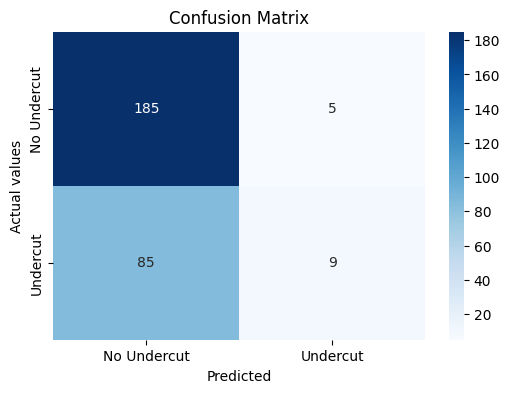


📊 All tested combinations sorted by recall score:
                                                params  mean_test_score  \
352  {'criterion': 'friedman_mse', 'learning_rate':...         0.085677   
354  {'criterion': 'friedman_mse', 'learning_rate':...         0.085677   
378  {'criterion': 'friedman_mse', 'learning_rate':...         0.080323   
376  {'criterion': 'friedman_mse', 'learning_rate':...         0.080323   
382  {'criterion': 'friedman_mse', 'learning_rate':...         0.080323   

     std_test_score  
352        0.030642  
354        0.030642  
378        0.028249  
376        0.028249  
382        0.028249  


In [31]:
# Grid Search for Gradient Boosting Classifier (optimizing for recall)
from sklearn.model_selection import GridSearchCV
from f1_project.f1_packages.model import initialize_model, train_model, pred
import numpy as np

# Convert y variables to 1d array using ravel()
y_train_1d = np.array(y_train).ravel()
y_test_1d = np.array(y_test).ravel()

# Define parameter grid for Gradient Boosting with valid parameters only
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.1],
    'loss': ['log_loss'],  # Using log_loss for better probability estimates
    'criterion': ['friedman_mse', 'squared_error'],
    'validation_fraction': [0.1],
    'n_iter_no_change': [10],
    'tol': [1e-4]
}

print("🔍 Starting Grid Search for Gradient Boosting (optimizing for recall)...")

# Initialize base model
base_model = initialize_model('SGD')

# Create GridSearchCV with focus on recall
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='recall',  # Optimizing for recall
    cv=3,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train_1d)

# Print results
print("\n✨ Best parameters for maximizing recall:")
print(grid_search.best_params_)
print(f"\n📈 Best recall score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
print("\n🎯 Evaluating best model on test set:")
y_pred, y_proba = pred(grid_search.best_estimator_, X_test_processed, y_test_1d)

# Store the best model
best_gb_recall_model = grid_search.best_estimator_

# Print all results in order of recall score
print("\n📊 All tested combinations sorted by recall score:")
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
print(results[['params', 'mean_test_score', 'std_test_score']].head())

## Random Forest for F1-Score

🔍 Starting Grid Search for Random Forest (optimizing for F1-score)...
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits

✨ Best parameters for maximizing F1-score:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

📈 Best F1 score: 0.4870

🎯 Evaluating best model on test set:
Report : 
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       190
           1       0.44      0.50      0.47        94

    accuracy                           0.62       284
   macro avg       0.58      0.59      0.59       284
weighted avg       0.63      0.62      0.63       284



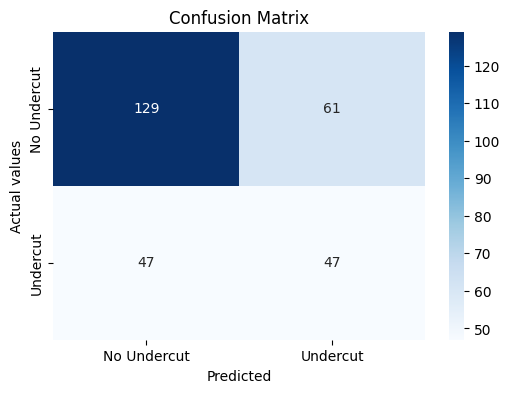


📊 All tested combinations sorted by F1 score:
                                                params  mean_test_score  \
67   {'class_weight': 'balanced', 'criterion': 'gin...         0.487015   
714  {'class_weight': 'balanced_subsample', 'criter...         0.483825   
436  {'class_weight': 'balanced_subsample', 'criter...         0.482356   
724  {'class_weight': 'balanced_subsample', 'criter...         0.480724   
721  {'class_weight': 'balanced_subsample', 'criter...         0.480724   

     std_test_score  
67         0.033265  
714        0.039468  
436        0.035275  
724        0.034307  
721        0.034307  


In [21]:
# Grid Search for Random Forest (optimizing for F1-score)
from sklearn.model_selection import GridSearchCV
from f1_project.f1_packages.model import initialize_model, train_model, pred
import numpy as np

# Convert y variables to 1d array using ravel()
y_train_1d = np.array(y_train).ravel()
y_test_1d = np.array(y_test).ravel()

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'criterion': ['gini', 'entropy']
}

print("🔍 Starting Grid Search for Random Forest (optimizing for F1-score)...")

# Initialize base model
base_model = initialize_model('randomforest')

# Create GridSearchCV with focus on F1-score
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='f1',  # Changed to optimize for F1-score
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train_1d)

# Print results
print("\n✨ Best parameters for maximizing F1-score:")
print(grid_search.best_params_)
print(f"\n📈 Best F1 score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
print("\n🎯 Evaluating best model on test set:")
y_pred, y_proba = pred(grid_search.best_estimator_, X_test_processed, y_test_1d)

# Store the best model
best_rf_f1_model = grid_search.best_estimator_

# Print all results in order of F1 score
print("\n📊 All tested combinations sorted by F1 score:")
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
print(results[['params', 'mean_test_score', 'std_test_score']].head())

## XGBOOST Classifier Forest for F1-Score

🔍 Starting Grid Search for XGBoost (optimizing for F1-score)...
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits

✨ Best parameters for maximizing F1-score:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'scale_pos_weight': 3, 'subsample': 0.9}

📈 Best F1 score: 0.5148

🎯 Evaluating best model on test set:
Report : 
              precision    recall  f1-score   support

           0       0.80      0.29      0.43       190
           1       0.37      0.85      0.52        94

    accuracy                           0.48       284
   macro avg       0.59      0.57      0.48       284
weighted avg       0.66      0.48      0.46       284



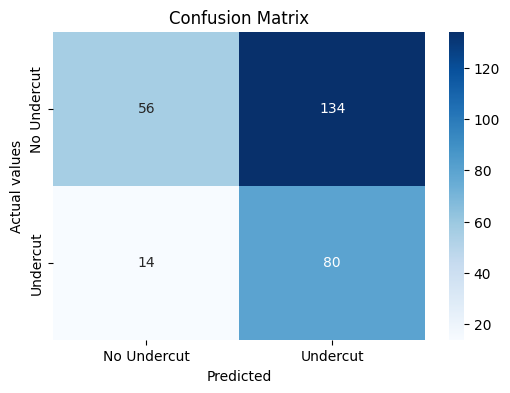


📊 All tested combinations sorted by F1 score:
                                                 params  mean_test_score  \
3958  {'colsample_bytree': 1.0, 'gamma': 0, 'learnin...         0.514776   
2508  {'colsample_bytree': 0.9, 'gamma': 0, 'learnin...         0.514730   
106   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...         0.514477   
2697  {'colsample_bytree': 0.9, 'gamma': 0, 'learnin...         0.513258   
2481  {'colsample_bytree': 0.9, 'gamma': 0, 'learnin...         0.512547   

      std_test_score  
3958        0.011884  
2508        0.015293  
106         0.019955  
2697        0.016391  
2481        0.018693  


In [30]:
# Grid Search for XGBoost (optimizing for F1-score)
from sklearn.model_selection import GridSearchCV
from f1_project.f1_packages.model import initialize_model, train_model, pred
import numpy as np

# Convert y variables to 1d array using ravel()
y_train_1d = np.array(y_train).ravel()
y_test_1d = np.array(y_test).ravel()

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05,0.1],
    'max_depth': [2,3],
    'min_child_weight': [1,2],
    'gamma': [0],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3],  # Help with class imbalance
    'reg_alpha': [0, 0.1, 0.5],     # L1 regularization
    'reg_lambda': [0.1, 1.0, 5.0]   # L2 regularization
}

print("🔍 Starting Grid Search for XGBoost (optimizing for F1-score)...")

# Initialize base model
base_model = initialize_model('XGBC')

# Create GridSearchCV with focus on F1-score
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='f1',  # Optimizing for F1-score
    cv=3,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train_1d)

# Print results
print("\n✨ Best parameters for maximizing F1-score:")
print(grid_search.best_params_)
print(f"\n📈 Best F1 score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
print("\n🎯 Evaluating best model on test set:")
y_pred, y_proba = pred(grid_search.best_estimator_, X_test_processed, y_test_1d)

# Store the best model
best_xgb_f1_model = grid_search.best_estimator_

# Print all results in order of F1 score
print("\n📊 All tested combinations sorted by F1 score:")
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
print(results[['params', 'mean_test_score', 'std_test_score']].head())

## Gradient Boosting Classifier F1-Score

🔍 Starting Grid Search for Gradient Boosting (optimizing for F1-score)...
Fitting 5 folds for each of 2304 candidates, totalling 11520 fits

✨ Best parameters for maximizing F1-score:
{'learning_rate': 0.05, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100, 'n_iter_no_change': 10, 'subsample': 1.0, 'tol': 0.001, 'validation_fraction': 0.1}

📈 Best F1 score: 0.1483

🎯 Evaluating best model on test set:
Report : 
              precision    recall  f1-score   support

           0       0.68      0.98      0.81       190
           1       0.73      0.09      0.15        94

    accuracy                           0.69       284
   macro avg       0.71      0.53      0.48       284
weighted avg       0.70      0.69      0.59       284



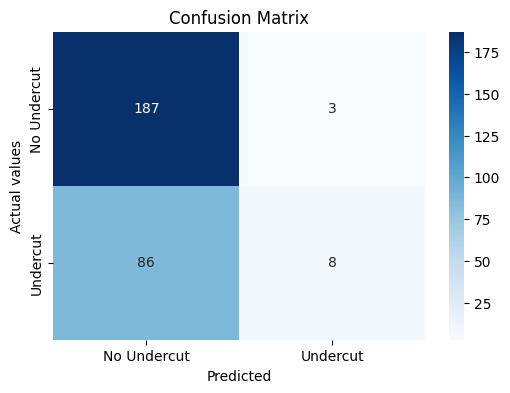


📊 All tested combinations sorted by F1 score:
                                                 params  mean_test_score  \
2206  {'learning_rate': 0.05, 'max_depth': 4, 'max_f...         0.148336   
2182  {'learning_rate': 0.05, 'max_depth': 4, 'max_f...         0.148336   
2228  {'learning_rate': 0.05, 'max_depth': 4, 'max_f...         0.148187   
2300  {'learning_rate': 0.05, 'max_depth': 4, 'max_f...         0.148187   
2252  {'learning_rate': 0.05, 'max_depth': 4, 'max_f...         0.148187   

      std_test_score  
2206        0.048401  
2182        0.048401  
2228        0.055178  
2300        0.055178  
2252        0.055178  


In [33]:
# Grid Search for Gradient Boosting Classifier (optimizing for F1-score)
from sklearn.model_selection import GridSearchCV
from f1_project.f1_packages.model import initialize_model, train_model, pred
import numpy as np

# Convert y variables to 1d array using ravel()
y_train_1d = np.array(y_train).ravel()
y_test_1d = np.array(y_test).ravel()

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10],
    'tol': [1e-4, 1e-3]
}

print("🔍 Starting Grid Search for Gradient Boosting (optimizing for F1-score)...")

# Initialize base model
base_model = initialize_model('SGD')

# Create GridSearchCV with focus on F1-score
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='f1',  # Optimizing for F1-score
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train_1d)

# Print results
print("\n✨ Best parameters for maximizing F1-score:")
print(grid_search.best_params_)
print(f"\n📈 Best F1 score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
print("\n🎯 Evaluating best model on test set:")
y_pred, y_proba = pred(grid_search.best_estimator_, X_test_processed, y_test_1d)

# Store the best model
best_gb_f1_model = grid_search.best_estimator_

# Print all results in order of F1 score
print("\n📊 All tested combinations sorted by F1 score:")
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values('mean_test_score', ascending=False)
print(results[['params', 'mean_test_score', 'std_test_score']].head())